In [1]:
using IMAS
using Plots

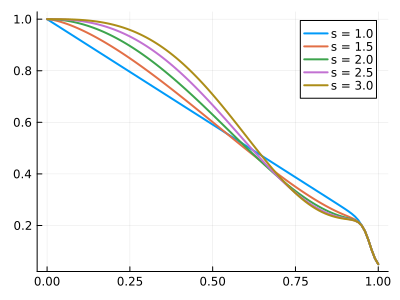

In [17]:
edge = 0.05
ped = 0.2
core = 1.0
ngrid = 101
shaping = [1.0, 1.5, 2.0, 2.5, 3.0]
ped_width = 0.05

xpsi = LinRange(0.0, 1.0, ngrid)

p = plot(size=(400,300))

for s in shaping

    prof = IMAS.Hmode_profiles(edge,ped,core,ngrid,s,s,ped_width)

    label = "s = "*string(s)
    plot!(p,xpsi,prof, lw=2, label=label)
end

display(p)